In [5]:

import pandas as pd

data = {
    'Страна': ['США', 'Япония', 'Германия', 'Франция', 'Великобритания', 'Италия', 'Канада', 'Бразилия', 'Швеция', 'Саудовская Аравия', 'Финляндия', 'Израиль'],
    'EE': [181.3, 61.61, 38.62, 33.59, 29.9, 15.95, 18.9, 8.92, 11.22, 6.4, 2.8, 1.81],
    'GDP': [2586.4, 140.45, 815.00, 655.29, 534.97, 395.52, 261.41, 249.72, 124.15, 115.97, 51.62, 20.94],
    'Р': [227.64, 116.78, 61.56, 53.71, 55.95, 57.04, 23.94, 123.03, 8.31, 8.37, 4.78, 3.87],
}

df = pd.DataFrame(data)




df['ЕЕ/Р'] = df['EE'] / df['Р']
df['GDP/Р'] = df['GDP'] / df['Р']


print(df)


               Страна      EE      GDP       Р      ЕЕ/Р      GDP/Р
0                 США  181.30  2586.40  227.64  0.796433  11.361799
1              Япония   61.61   140.45  116.78  0.527573   1.202689
2            Германия   38.62   815.00   61.56  0.627355  13.239116
3             Франция   33.59   655.29   53.71  0.625396  12.200521
4      Великобритания   29.90   534.97   55.95  0.534406   9.561573
5              Италия   15.95   395.52   57.04  0.279628   6.934081
6              Канада   18.90   261.41   23.94  0.789474  10.919382
7            Бразилия    8.92   249.72  123.03  0.072503   2.029749
8              Швеция   11.22   124.15    8.31  1.350181  14.939832
9   Саудовская Аравия    6.40   115.97    8.37  0.764636  13.855436
10          Финляндия    2.80    51.62    4.78  0.585774  10.799163
11            Израиль    1.81    20.94    3.87  0.467700   5.410853


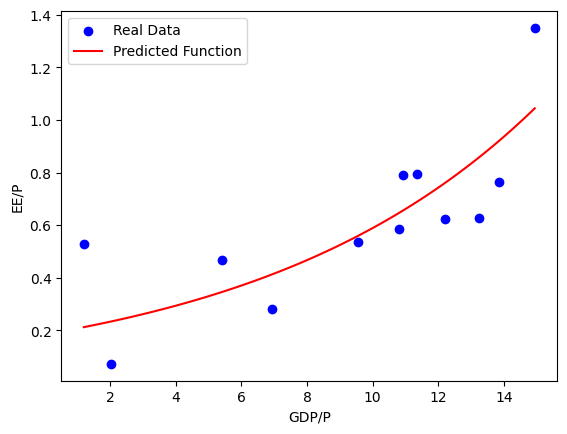

Optimized Parameters: a = 0.18474178376339584, b = 0.11595051942550576


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Real data
X_real = df['GDP/Р']
Y_real = df['ЕЕ/Р']

# Define a nonlinear function to fit (you can choose an appropriate function)
def nonlinear_func(x, a, b):
    return a * np.exp(b * x)

# Fit the nonlinear function to the data
params, covariance = curve_fit(nonlinear_func, X_real, Y_real)

# Get the optimized parameters
a_opt, b_opt = params

# Generate predicted values based on the fitted function
X_pred = np.linspace(X_real.min(), X_real.max(), 100)
Y_pred = nonlinear_func(X_pred, a_opt, b_opt)

# Create a scatter plot for real data
plt.scatter(X_real, Y_real, label='Real Data', color='blue')

# Create a line plot for the predicted function
plt.plot(X_pred, Y_pred, label='Predicted Function', color='red')

# Add labels and a legend
plt.xlabel('GDP/Р')
plt.ylabel('ЕЕ/Р')
plt.legend()

# Show the plot
plt.show()

# Print optimized parameters
print(f'Optimized Parameters: a = {a_opt}, b = {b_opt}')


ЕЕ/Р=0.1384+0.0512*GDP/Р

Новое ЕЕ/Р=0.1384+0.0512∗(1.20∗GDP/Р)



In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a DataFrame with your data
data = {
    'Year': np.arange(20),
    'Consumption (y)': [30.8, 31.2, 33.3, 35.6, 36.4, 36.7, 38.4, 40.4, 40.3, 41.8, 40.4, 40.7, 40.1, 42.7, 44.1, 46.7, 50.6, 50.1, 51.7, 52.9],
    'Income (x1)': [459.7, 492.9, 528.6, 560.3, 624.6, 666.4, 717.8, 768.2, 843.3, 911.6, 931.1, 1021.5, 1165.9, 1349.6, 1449.4, 1575.5, 1759.1, 1994.2, 2258.1, 2478.7],
    'Chicken Price (x2)': [39.5, 37.3, 38.1, 39.3, 37.8, 38.4, 40.1, 38.6, 39.8, 39.7, 52.1, 48.9, 58.3, 57.9, 56.5, 63.7, 61.6, 58.9, 66.4, 70.4],
    'Pork Price (x3)': [55.3, 54.7, 63.7, 69.8, 65.9, 64.5, 70.0, 73.2, 67.8, 79.1, 95.4, 94.2, 123.5, 129.9, 117.6, 130.9, 129.8, 128.0, 141.0, 168.2],
    'Beef Price (x4)': [79.2, 77.4, 80.2, 80.4, 83.9, 85.5, 93.7, 106.1, 104.8, 114.0, 124.1, 127.6, 142.9, 143.6, 139.2, 165.5, 203.3, 219.6, 221.6, 232.6]
}

df = pd.DataFrame(data)

# Model 1: Demand function y = a*(x2)^b
X1 = np.log(df['Chicken Price (x2)']).values.reshape(-1, 1)
y1 = np.log(df['Consumption (y)'])
model1 = LinearRegression().fit(X1, y1)
a1 = np.exp(model1.intercept_)
b1 = model1.coef_[0]

# Model 2: Consumption function y = a*(x1)^b
X2 = np.log(df['Income (x1)']).values.reshape(-1, 1)
y2 = np.log(df['Consumption (y)'])
model2 = LinearRegression().fit(X2, y2)
a2 = np.exp(model2.intercept_)
b2 = model2.coef_[0]

# Model 3: Demand and Consumption function y = a*(x1)^b*(x2)^c
X3 = np.column_stack((np.log(df['Income (x1)']), np.log(df['Chicken Price (x2)'])))
y3 = np.log(df['Consumption (y)'])
model3 = LinearRegression().fit(X3, y3)
a3 = np.exp(model3.intercept_)
b3 = model3.coef_[0]
c3 = model3.coef_[1]

# Model 4: Demand with product substitutes y = a*(x2)^b*(x3)^c*(x4)^d
X4 = np.column_stack((np.log(df['Chicken Price (x2)']), np.log(df['Pork Price (x3)']), np.log(df['Beef Price (x4)'])))
y4 = np.log(df['Consumption (y)'])
model4 = LinearRegression().fit(X4, y4)
a4 = np.exp(model4.intercept_)
b4 = model4.coef_[0]
c4 = model4.coef_[1]
d4 = model4.coef_[2]

# Print the coefficients for each model
print(f"Model 1: y = {a1:.2f} * (x2)^{b1:.2f}")
print(f"Model 2: y = {a2:.2f} * (x1)^{b2:.2f}")
print(f"Model 3: y = {a3:.2f} * (x1)^{b3:.2f} * (x2)^{c3:.2f}")
print(f"Model 4: y = {a4:.2f} * (x2)^{b4:.2f} * (x3)^{c4:.2f} * (x4)^{d4:.2f}")


Model 1: y = 4.18 * (x2)^0.59
Model 2: y = 5.35 * (x1)^0.29
Model 3: y = 7.52 * (x1)^0.43 * (x2)^-0.33
Model 4: y = 11.08 * (x2)^-0.63 * (x3)^0.35 * (x4)^0.45


In [12]:
# Using the coefficients from Model 4
x2 = np.log(df['Chicken Price (x2)'])  # Storing the log-transformed values
x3 = np.log(df['Pork Price (x3)'])
x4 = np.log(df['Beef Price (x4)'])

# New price for beef (increased by a factor of 8)
new_x4 = np.log(8 * np.exp(x4))

# Predicting the new level of chicken consumption
y_new = np.exp(model4.intercept_ + b4 * x2 + c4 * x3 + d4 * new_x4)

# Display the new level of chicken consumption
print(f"New level of chicken consumption: {y_new[0]:.2f}")


New level of chicken consumption: 81.99
